## SVM

lambda = 
[[1.77249323e-09 2.54409063e-09 1.54005753e-09 2.07965583e-09
  3.78882254e+00 2.67754395e-09 2.46418103e-09 1.05494263e-09
  2.73076749e-09 2.02471088e-09 2.76256394e-09 3.19161190e-09
  1.23694991e-09 2.11337753e-09 2.06402761e-09 2.36500849e-09
  1.40002069e-09 2.69441522e-09 2.32482447e-09 3.78882254e+00]]
line =
-2.1965610694381494 -1.6591456550081478
8.249006227312977
[[ 0.81839761  0.40035553]
 [ 0.99768709  1.73676612]
 [ 0.54261362  0.14903807]
 [ 0.99859334  1.33269904]
 [ 2.12025232  1.56209465]
 [ 1.31006016  0.70731251]
 [ 1.29576993  1.19092   ]
 [-0.21250488  0.03296529]
 [ 1.18293976  1.59438346]
 [ 1.08489749  1.05287423]]


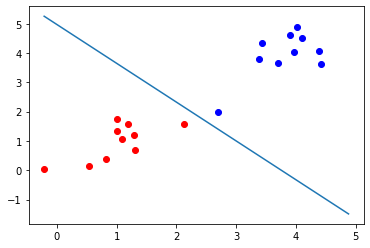

In [44]:
import numpy as np
from classifier.SVM import SVM

import matplotlib.pyplot as plt

means = [[1, 1], [4, 4]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X1[-1, :] = [2.7, 2]

svm = SVM(X0, X1).fit()

w, b = svm.get_hyperplane()
print('line =')
print(w[0][0], w[1][0], b)

# plot
plt.scatter(x=X0[:, 0], y=X0[:, 1], color='red')
plt.scatter(x=X1[:, 0], y=X1[:, 1], color='blue')

xx = np.linspace(np.min(X0), np.max(X1), 8)
yy = (-b - w[0][0]*xx) / w[1][0]

plt.plot(xx, yy)

## Soft-margin SVM